### Models performance comparison

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
baseline = pd.read_csv("baseline_performance.csv")
effnetB1 = pd.read_csv("EfficientNetB1_performance.csv")
effnetB1_pre = pd.read_csv("EfficientNetB1_image_preprocessing_performance.csv")

In [3]:
performance = baseline.append(effnetB1).append(effnetB1_pre)
performance

,Model,Train accuracy,Train loss,Test accuracy,Test loss,Glioma Precision,Glioma Recall,Meningioma Precision,Meningioma Recall,No Tumor Precision,No Tumor Recall,Pituitary Precision,Pituitary Recall
0,Baseline model,0.994338,0.018203,0.685279,5.407233,1.000000,0.17,0.640719,0.930435,0.626506,0.990476,0.954545,0.567568
0,EffNetB1 model,0.989987,0.030249,0.776650,1.677352,0.888889,0.24,0.676647,0.982609,0.823529,0.933333,0.876543,0.959459
0,EffNetB1 preprocess model,0.994340,0.016133,0.794416,2.171711,1.000000,0.27,0.680723,0.982609,0.809524,0.971429,0.946667,0.959459


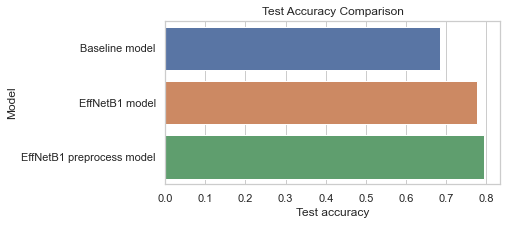

In [4]:
# Plot test accuracy comparison
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 3))
sns.barplot(x='Test accuracy', y='Model', data=performance)
plt.title("Test Accuracy Comparison")
plt.show()

In [5]:
# Construct dataframe of precision and recall rates
glioma = performance[['Model', 'Glioma Precision', 'Glioma Recall']]
glioma.columns = ['Model', 'Precision Rate', 'Recall Rate']
glioma['Tumor'] = 'Glioma'

meningioma = performance[['Model', 'Meningioma Precision', 'Meningioma Recall']]
meningioma.columns = ['Model', 'Precision Rate', 'Recall Rate']
meningioma['Tumor'] = 'Meningioma'

no_tumor = performance[['Model', 'No Tumor Precision', 'No Tumor Recall']]
no_tumor.columns = ['Model', 'Precision Rate', 'Recall Rate']
no_tumor['Tumor'] = 'No Tumor'

pituitary = performance[['Model', 'Pituitary Precision', 'Pituitary Recall']]
pituitary.columns = ['Model', 'Precision Rate', 'Recall Rate']
pituitary['Tumor'] = 'Pituitary'

precision_recall = glioma.append(meningioma).append(no_tumor).append(pituitary)
precision_recall

<ipython-input-5-75dc23c400cd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  glioma['Tumor'] = 'Glioma'
<ipython-input-5-75dc23c400cd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meningioma['Tumor'] = 'Meningioma'
<ipython-input-5-75dc23c400cd>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

,Model,Precision Rate,Recall Rate,Tumor
0,Baseline model,1.000000,0.170000,Glioma
0,EffNetB1 model,0.888889,0.240000,Glioma
0,EffNetB1 preprocess model,1.000000,0.270000,Glioma
0,Baseline model,0.640719,0.930435,Meningioma
0,EffNetB1 model,0.676647,0.982609,Meningioma
0,EffNetB1 preprocess model,0.680723,0.982609,Meningioma
0,Baseline model,0.626506,0.990476,No Tumor
0,EffNetB1 model,0.823529,0.933333,No Tumor
0,EffNetB1 preprocess model,0.809524,0.971429,No Tumor
0,Baseline model,0.954545,0.567568,Pituitary


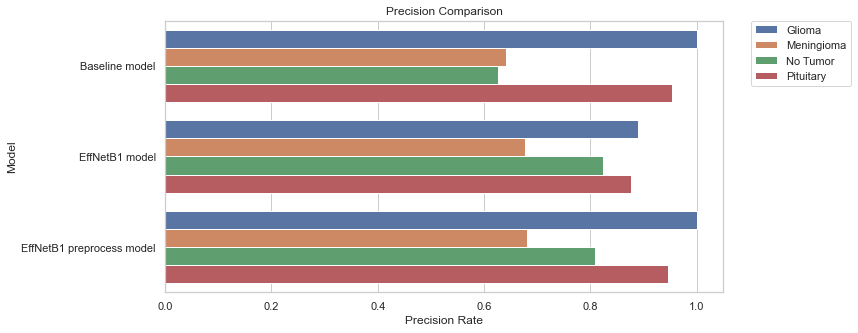

In [6]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='Precision Rate', y='Model', hue='Tumor', data=precision_recall)
plt.title("Precision Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

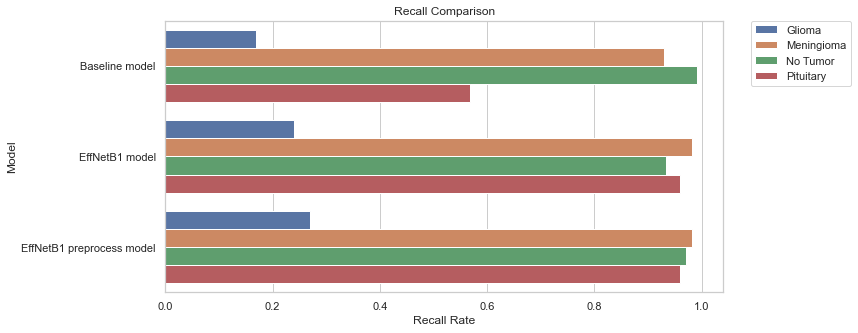

In [7]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='Recall Rate', y='Model', hue='Tumor', data=precision_recall)
plt.title("Recall Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()